In [1]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Step 2: Load Dataset
df = pd.read_csv("amazon_delivery.csv")

# Step 3: Basic Info
print("Shape of dataset:", df.shape)
print("\nFirst 5 rows:\n", df.head())
print("\nData types:\n", df.dtypes)


Shape of dataset: (43739, 16)

First 5 rows:
         Order_ID  Agent_Age  Agent_Rating  Store_Latitude  Store_Longitude  \
0  ialx566343618         37           4.9       22.745049        75.892471   
1  akqg208421122         34           4.5       12.913041        77.683237   
2  njpu434582536         23           4.4       12.914264        77.678400   
3  rjto796129700         38           4.7       11.003669        76.976494   
4  zguw716275638         32           4.6       12.972793        80.249982   

   Drop_Latitude  Drop_Longitude  Order_Date Order_Time Pickup_Time  \
0      22.765049       75.912471  2022-03-19   11:30:00    11:45:00   
1      13.043041       77.813237  2022-03-25   19:45:00    19:50:00   
2      12.924264       77.688400  2022-03-19   08:30:00    08:45:00   
3      11.053669       77.026494  2022-04-05   18:00:00    18:10:00   
4      13.012793       80.289982  2022-03-26   13:30:00    13:45:00   

      Weather  Traffic      Vehicle            Area  Deliv

In [2]:
# Check missing values
print("Missing values in dataset:\n", df.isnull().sum())


Missing values in dataset:
 Order_ID            0
Agent_Age           0
Agent_Rating       54
Store_Latitude      0
Store_Longitude     0
Drop_Latitude       0
Drop_Longitude      0
Order_Date          0
Order_Time          0
Pickup_Time         0
Weather            91
Traffic             0
Vehicle             0
Area                0
Delivery_Time       0
Category            0
dtype: int64


In [5]:
# Check duplicates
print("Duplicate rows:", df.duplicated().sum())

df = df.drop_duplicates()



Duplicate rows: 0


In [6]:
# Convert Order_Date to datetime
df['Order_Date'] = pd.to_datetime(df['Order_Date'], errors='coerce')

# Convert Order_Time and Pickup_Time to datetime (time only)
df['Order_Time'] = pd.to_datetime(df['Order_Time'], errors='coerce').dt.time
df['Pickup_Time'] = pd.to_datetime(df['Pickup_Time'], errors='coerce').dt.time


In [7]:
print("\nDataset Info after cleaning:")
print(df.info())
print("\nSummary Statistics:\n", df.describe(include='all'))



Dataset Info after cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43739 entries, 0 to 43738
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Order_ID         43739 non-null  object        
 1   Agent_Age        43739 non-null  int64         
 2   Agent_Rating     43685 non-null  float64       
 3   Store_Latitude   43739 non-null  float64       
 4   Store_Longitude  43739 non-null  float64       
 5   Drop_Latitude    43739 non-null  float64       
 6   Drop_Longitude   43739 non-null  float64       
 7   Order_Date       43739 non-null  datetime64[ns]
 8   Order_Time       43648 non-null  object        
 9   Pickup_Time      43739 non-null  object        
 10  Weather          43648 non-null  object        
 11  Traffic          43739 non-null  object        
 12  Vehicle          43739 non-null  object        
 13  Area             43739 non-null  object        
 14  Delivery

In [8]:
#Feature Engineering
# Function for haversine distance (in km)
from math import radians, cos, sin, asin, sqrt

def haversine(lon1, lat1, lon2, lat2):
    # convert decimal degrees to radians
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a))
    r = 6371 # Radius of earth in km
    return c * r

# Apply to dataset
df['Distance_km'] = df.apply(lambda x: haversine(x['Store_Longitude'], x['Store_Latitude'],
                                                 x['Drop_Longitude'], x['Drop_Latitude']), axis=1)

print(df[['Store_Latitude','Store_Longitude','Drop_Latitude','Drop_Longitude','Distance_km']].head())


   Store_Latitude  Store_Longitude  Drop_Latitude  Drop_Longitude  Distance_km
0       22.745049        75.892471      22.765049       75.912471     3.025149
1       12.913041        77.683237      13.043041       77.813237    20.183530
2       12.914264        77.678400      12.924264       77.688400     1.552758
3       11.003669        76.976494      11.053669       77.026494     7.790401
4       12.972793        80.249982      13.012793       80.289982     6.210138


In [9]:
# Fill Agent_Rating with mean
df['Agent_Rating'].fillna(df['Agent_Rating'].mean(), inplace=True)

# Fill categorical columns with mode
df['Order_Time'].fillna(df['Order_Time'].mode()[0], inplace=True)
df['Weather'].fillna(df['Weather'].mode()[0], inplace=True)


In [10]:
# Check missing values
print("Missing values in dataset:\n", df.isnull().sum())

Missing values in dataset:
 Order_ID           0
Agent_Age          0
Agent_Rating       0
Store_Latitude     0
Store_Longitude    0
Drop_Latitude      0
Drop_Longitude     0
Order_Date         0
Order_Time         0
Pickup_Time        0
Weather            0
Traffic            0
Vehicle            0
Area               0
Delivery_Time      0
Category           0
Distance_km        0
dtype: int64


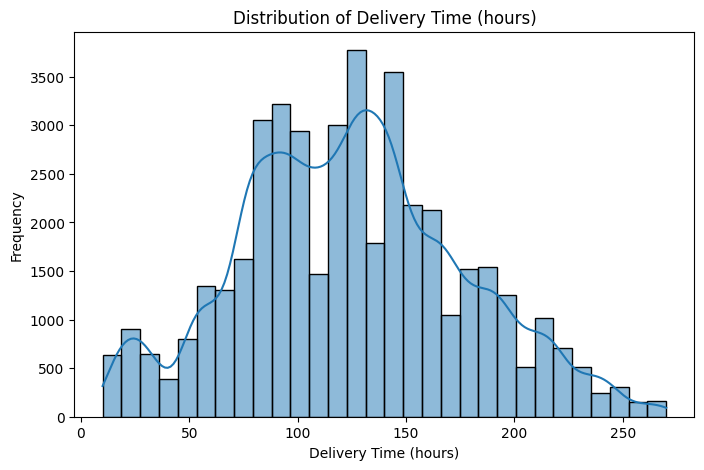

In [12]:
#EDA (Exploratory Data Analysis)
plt.figure(figsize=(8,5))
sns.histplot(df['Delivery_Time'], bins=30, kde=True)
plt.title("Distribution of Delivery Time (hours)")
plt.xlabel("Delivery Time (hours)")
plt.ylabel("Frequency")
plt.show()


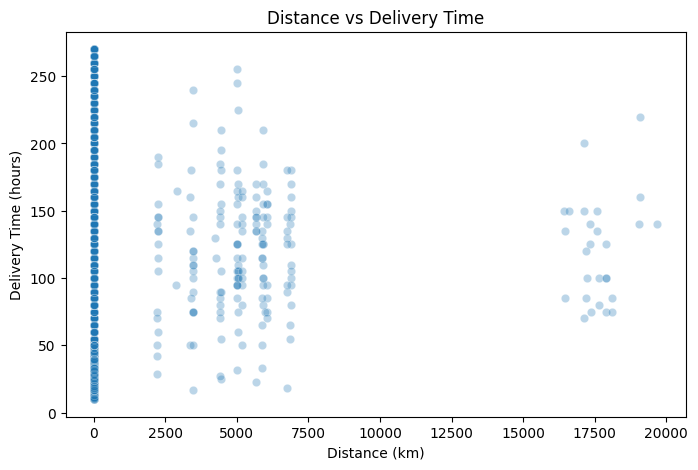

In [13]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Distance_km', y='Delivery_Time', data=df, alpha=0.3)
plt.title("Distance vs Delivery Time")
plt.xlabel("Distance (km)")
plt.ylabel("Delivery Time (hours)")
plt.show()


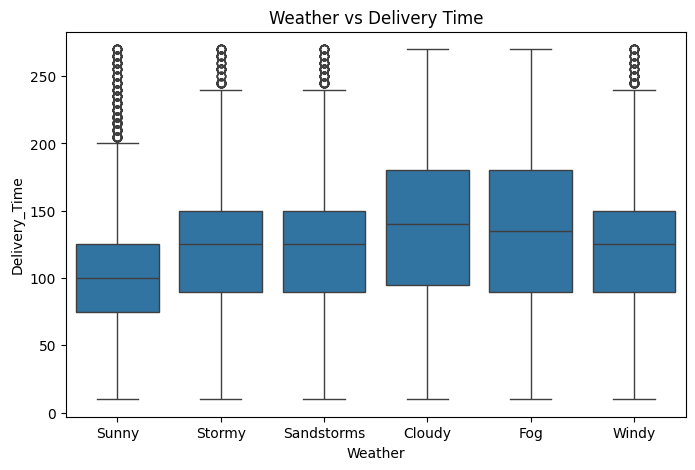

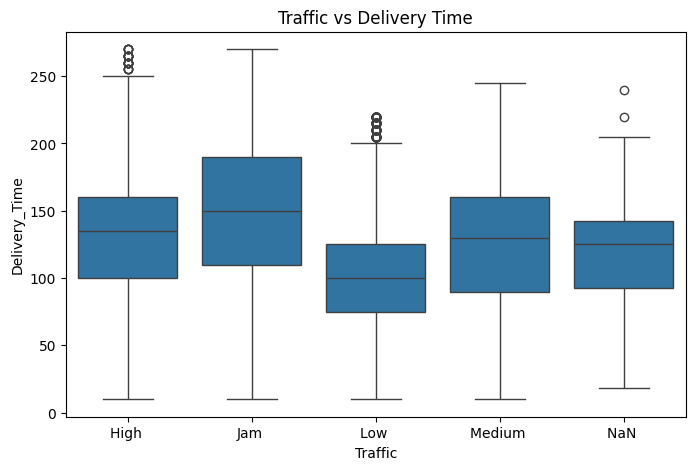

In [14]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Weather', y='Delivery_Time', data=df)
plt.title("Weather vs Delivery Time")
plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(x='Traffic', y='Delivery_Time', data=df)
plt.title("Traffic vs Delivery Time")
plt.show()


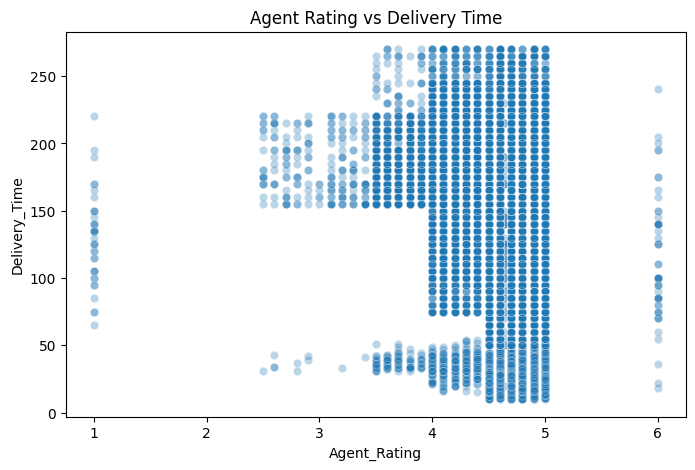

In [15]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Agent_Rating', y='Delivery_Time', data=df, alpha=0.3)
plt.title("Agent Rating vs Delivery Time")
plt.show()


In [17]:
# Re-convert Order_Time column
df['Order_Time'] = pd.to_datetime(df['Order_Time'], format='%H:%M:%S', errors='coerce')

# Extract hour safely
df['Order_Hour'] = df['Order_Time'].dt.hour


In [18]:
print(df[['Order_Time','Order_Hour']].head())


           Order_Time  Order_Hour
0 1900-01-01 11:30:00          11
1 1900-01-01 19:45:00          19
2 1900-01-01 08:30:00           8
3 1900-01-01 18:00:00          18
4 1900-01-01 13:30:00          13


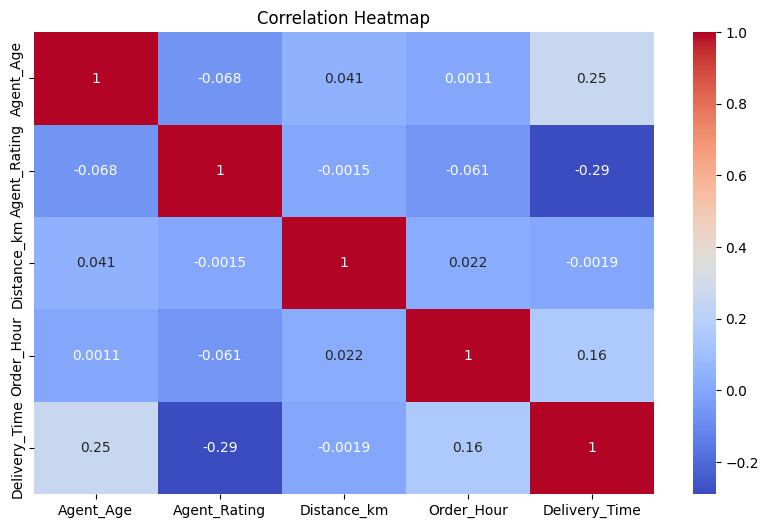

In [19]:
plt.figure(figsize=(10,6))
sns.heatmap(df[['Agent_Age','Agent_Rating','Distance_km','Order_Hour','Delivery_Time']].corr(),
            annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [20]:
#Model Development
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encode categorical features
cat_cols = ['Weather', 'Traffic', 'Vehicle', 'Area', 'Category']
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

# Features & Target
X = df[['Agent_Age','Agent_Rating','Distance_km','Order_Hour',
        'Weather','Traffic','Vehicle','Area','Category']]
y = df['Delivery_Time']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Train shape:", X_train.shape, " Test shape:", X_test.shape)


Train shape: (34991, 9)  Test shape: (8748, 9)


In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Train model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predictions
y_pred = lr.predict(X_test)

# Evaluation
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Linear Regression Results:")
print("MAE:", mae)
print("RMSE:", rmse)
print("R² Score:", r2)


Linear Regression Results:
MAE: 34.78998951463763
RMSE: 45.0310362004141
R² Score: 0.2387982430506289


In [22]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("Random Forest Results:")
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("R² Score:", r2_score(y_test, y_pred_rf))


Random Forest Results:
MAE: 17.81775634430727
RMSE: 23.127476490112922
R² Score: 0.7992144765108957


In [23]:
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, random_state=42)
gb.fit(X_train, y_train)

y_pred_gb = gb.predict(X_test)

print("Gradient Boosting Results:")
print("MAE:", mean_absolute_error(y_test, y_pred_gb))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_gb)))
print("R² Score:", r2_score(y_test, y_pred_gb))


Gradient Boosting Results:
MAE: 18.706981856051772
RMSE: 23.709690530575116
R² Score: 0.7889780306456873


In [24]:
import pickle
with open("rf_model.pkl", "wb") as f:
    pickle.dump(rf, f)
